# Malicious And Benign Website Detection

## Aditya Mani Tripathi (12017318)

* 1: Introduction
* 2: Data Sourcing
* 3: Data Cleaning And Processing
* 4: Exploratory Data Analysis 
* 5: Model Creation
* 6: Model Testing

# (1) Introduction:
With the increasing number of websites, the threat of encountering malicious websites has grown. Machine learning has emerged as a promising approach for website classification, using features and historical data to detect malicious and benign websites. In this study, we propose a machine learning-based model for this task, leveraging diverse features and evaluating its performance on a large dataset. Our results contribute to web security by proposing an effective and robust approach for detecting malicious websites and enhancing users' safety online.




In [1]:
# Importing the necessary libraries 

import numpy as np  # Import NumPy library for numerical computing
import pandas as pd  # Import Pandas library for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib library for data visualization
from datetime import datetime  # Import datetime module for working with dates and times
import seaborn as sns  # Import Seaborn library for statistical data visualization


## Sourcing the Dataset

In [2]:
df = pd.read_csv('dataset.csv')  # Reading the dataset.csv file
df.head()  # Displaying the first few rows of the DataFrame

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
df.info()  # Displaying information about the DataFrame, including data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
#Checking the null values
df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [5]:
df['CHARSET'].unique()  # Retrieving unique values in the 'CHARSET' column of the DataFrame

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

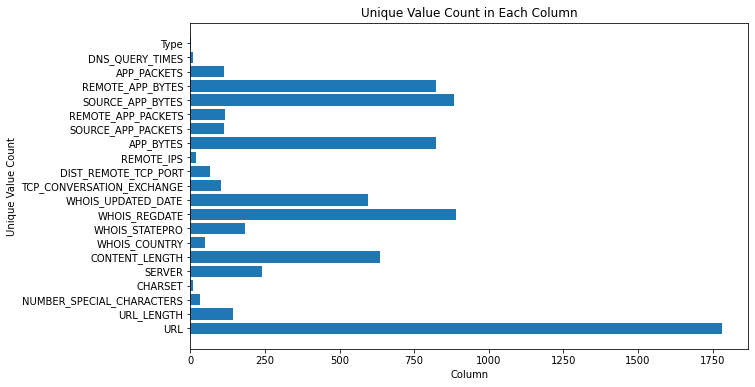

In [6]:
# Create a list to store the number of unique values for each column
unique_counts = []
for col in df.columns:
    unique_counts.append(df[col].nunique())
    
# Set the figure size
plt.figure(figsize=(10, 6)) # Adjust the width and height as needed

# Create a bar graph
plt.barh(df.columns, unique_counts)
plt.xlabel('Column')
plt.ylabel('Unique Value Count')
plt.title('Unique Value Count in Each Column')
plt.show()

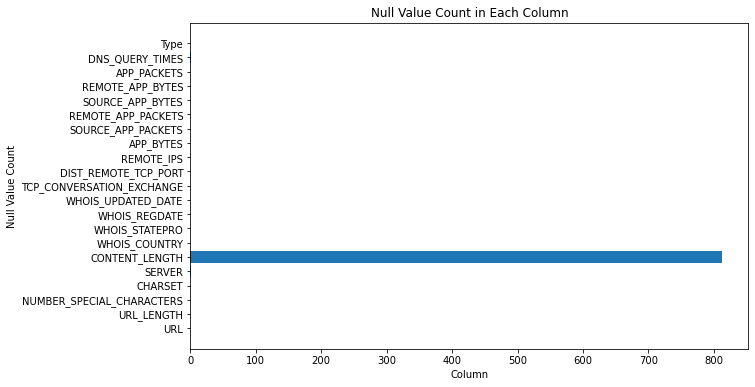

In [7]:
# Create a list to store the number of null values for each column
unique_counts = []
for col in df.columns:
    unique_counts.append(df[col].isnull().sum())

# Set the figure size
plt.figure(figsize=(10, 6)) # Adjust the width and height as needed

# Create a bar graph
plt.barh(df.columns, unique_counts)
plt.xlabel('Column')
plt.ylabel('Null Value Count')
plt.title('Null Value Count in Each Column')
plt.show()

In [8]:
new_df = df.drop(['URL', 'CONTENT_LENGTH'], axis=1)  # Creating a new DataFrame 'new_df' by dropping the 'URL' and 'CONTENT_LENGTH' columns from 'df'

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1781 non-null   object 
 3   SERVER                     1780 non-null   object 
 4   WHOIS_COUNTRY              1781 non-null   object 
 5   WHOIS_STATEPRO             1781 non-null   object 
 6   WHOIS_REGDATE              1781 non-null   object 
 7   WHOIS_UPDATED_DATE         1781 non-null   object 
 8   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 9   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 10  REMOTE_IPS                 1781 non-null   int64  
 11  APP_BYTES                  1781 non-null   int64  
 12  SOURCE_APP_PACKETS         1781 non-null   int64  
 13  REMOTE_APP_PACKETS         1781 non-null   int64

In [10]:
new_df['URL_LENGTH'].describe()

count    1781.000000
mean       56.961258
std        27.555586
min        16.000000
25%        39.000000
50%        49.000000
75%        68.000000
max       249.000000
Name: URL_LENGTH, dtype: float64

In [11]:
new_df['URL_LENGTH'].unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120,
       122, 123, 124, 125, 126, 128, 129, 131, 132, 134, 135, 136, 137,
       139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 154, 156,
       160, 161, 169, 170, 173, 178, 183, 194, 198, 201, 234, 249],
      dtype=int64)

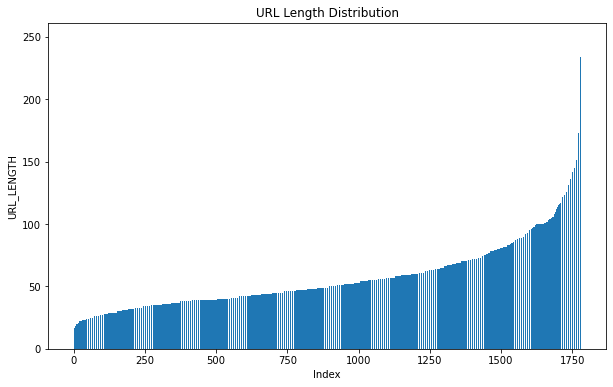

In [12]:
# Plotting a bar graph of URL_LENGTH
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(new_df['URL_LENGTH'].index, new_df['URL_LENGTH'].values)  # Plotting the bar graph
plt.xlabel('Index')  # X-axis label
plt.ylabel('URL_LENGTH')  # Y-axis label
plt.title('URL Length Distribution')  # Title of the graph
plt.show()  # Display the graph

In [13]:
new_df[new_df['URL_LENGTH'] > 100].count()

URL_LENGTH                   129
NUMBER_SPECIAL_CHARACTERS    129
CHARSET                      129
SERVER                       129
WHOIS_COUNTRY                129
WHOIS_STATEPRO               129
WHOIS_REGDATE                129
WHOIS_UPDATED_DATE           129
TCP_CONVERSATION_EXCHANGE    129
DIST_REMOTE_TCP_PORT         129
REMOTE_IPS                   129
APP_BYTES                    129
SOURCE_APP_PACKETS           129
REMOTE_APP_PACKETS           129
SOURCE_APP_BYTES             129
REMOTE_APP_BYTES             129
APP_PACKETS                  129
DNS_QUERY_TIMES              128
Type                         129
dtype: int64

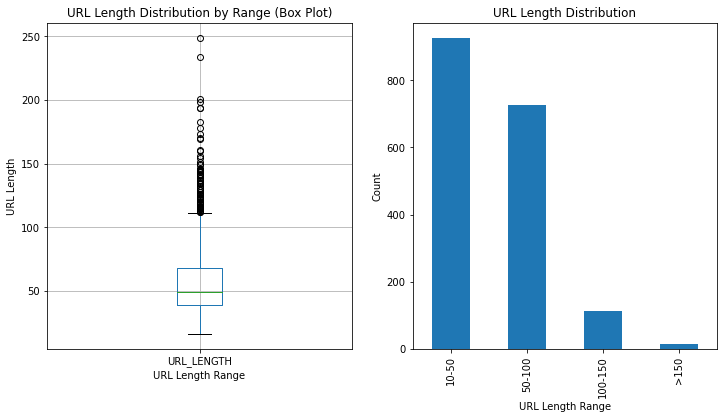

<Figure size 432x288 with 0 Axes>

In [14]:
# Define the bins and labels for the URL length ranges
bins = [10, 50, 100, 150, float('inf')]
labels = ['10-50', '50-100', '100-150', '>150']

# Use pd.cut() to categorize 'URL_LENGTH' values into bins and assign labels
url_length_bins = pd.cut(new_df['URL_LENGTH'], bins=bins, labels=labels)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a box plot on the first subplot
new_df.boxplot(column='URL_LENGTH',showfliers=True, ax=ax1)
ax1.set_title('URL Length Distribution by Range (Box Plot)')
ax1.set_xlabel('URL Length Range')
ax1.set_ylabel('URL Length')

# Use pd.cut() to categorize 'URL_LENGTH' values into bins and assign labels
url_length_bins = pd.cut(new_df['URL_LENGTH'], bins=bins, labels=labels)

# Use value_counts() to get the count of unique values in 'URL_LENGTH' bins
url_length_counts = url_length_bins.value_counts()

# Sort the value counts by index (URL length ranges)
url_length_counts = url_length_counts.sort_index()

# Create a bar plot from the value counts
url_length_counts.plot.bar()

# Set plot title and axis labels
plt.title('URL Length Distribution')
plt.xlabel('URL Length Range')
plt.ylabel('Count')

# Display the plot
plt.show()


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


In [15]:
new_df['URL_LENGTH'].describe()

count    1781.000000
mean       56.961258
std        27.555586
min        16.000000
25%        39.000000
50%        49.000000
75%        68.000000
max       249.000000
Name: URL_LENGTH, dtype: float64

In [16]:
new_df = new_df[new_df['URL_LENGTH'] <= 100]

In [17]:
new_df['URL_LENGTH'].describe()

count    1652.000000
mean       51.463075
std        18.576682
min        16.000000
25%        38.000000
50%        48.000000
75%        62.000000
max       100.000000
Name: URL_LENGTH, dtype: float64

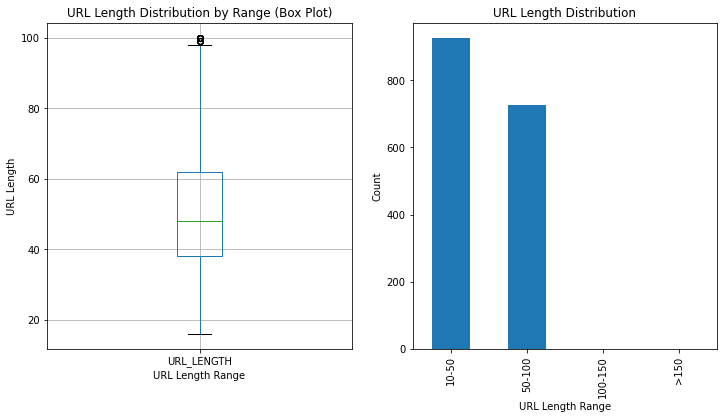

<Figure size 432x288 with 0 Axes>

In [18]:
# Define the bins and labels for the URL length ranges
bins = [10, 50, 100, 150, float('inf')]
labels = ['10-50', '50-100', '100-150', '>150']

# Use pd.cut() to categorize 'URL_LENGTH' values into bins and assign labels
url_length_bins = pd.cut(new_df['URL_LENGTH'], bins=bins, labels=labels)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a box plot on the first subplot
new_df.boxplot(column='URL_LENGTH',showfliers=True, ax=ax1)
ax1.set_title('URL Length Distribution by Range (Box Plot)')
ax1.set_xlabel('URL Length Range')
ax1.set_ylabel('URL Length')

# Use pd.cut() to categorize 'URL_LENGTH' values into bins and assign labels
url_length_bins = pd.cut(new_df['URL_LENGTH'], bins=bins, labels=labels)

# Use value_counts() to get the count of unique values in 'URL_LENGTH' bins
url_length_counts = url_length_bins.value_counts()

# Sort the value counts by index (URL length ranges)
url_length_counts = url_length_counts.sort_index()

# Create a bar plot from the value counts
url_length_counts.plot.bar()

# Set plot title and axis labels
plt.title('URL Length Distribution')
plt.xlabel('URL Length Range')
plt.ylabel('Count')

# Display the plot
plt.show()


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


In [19]:
new_df.shape

(1652, 19)

In [20]:
new_df['CHARSET'].nunique()

9

In [21]:
new_df['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [22]:
# Create a function to extract charset type
def extract_charset_type(charset):
    if 'iso' in charset.lower():
        return 'ISO'
    elif 'utf' in charset.lower():
        return 'UTF'
    elif 'ascii' in charset.lower():
        return 'ASCII'
    elif 'windows' in charset.lower():
        return 'Windows'
    else:
        return 'Other'

# Apply the function to create a new column 'charset_type'
new_df['CHARSET_TYPE'] = new_df['CHARSET'].apply(extract_charset_type)



In [23]:
new_df['CHARSET_TYPE'].unique()

array(['ISO', 'UTF', 'ASCII', 'Other', 'Windows'], dtype=object)

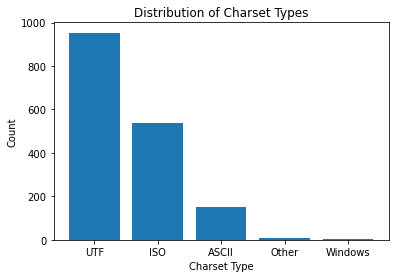

In [24]:
# Get value counts of 'charset_type' column
charset_type_counts = new_df['CHARSET_TYPE'].value_counts()

# Create a bar plot of 'charset_type' column
plt.bar(charset_type_counts.index, charset_type_counts.values)
plt.xlabel('Charset Type')
plt.ylabel('Count')
plt.title('Distribution of Charset Types')
plt.show()

In [25]:
new_df['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [26]:
# Create a function to map server types based on keywords
def map_server_type(server):
    if pd.isna(server):
        return 'others'
    elif 'apache' in str(server).lower():
        return 'Apache'
    elif 'nginx' in str(server).lower():
        return 'nginx'
    elif 'microsoft' in str(server).lower():
        return 'Microsoft'
    else:
        return 'others'

# Apply the function to create a new column 'server_type'
new_df['SERVER_TYPE'] = new_df['SERVER'].apply(map_server_type)


In [27]:
new_df['WHOIS_REGDATE']

0       10/10/2015 18:21
1                   None
2                   None
3         7/10/1997 4:00
4        12/05/1996 0:00
              ...       
1647     17/09/2008 0:00
1648     17/09/2008 0:00
1649     27/09/2000 0:00
1650      5/11/2003 0:00
1651      3/01/2009 0:00
Name: WHOIS_REGDATE, Length: 1652, dtype: object

In [28]:
# Convert date of registration column to datetime data type
new_df['WHOIS_REGDATE'] = pd.to_datetime(new_df['WHOIS_REGDATE'], format='%d/%m/%Y %H:%M', errors='coerce')

# Get current date and time
now = datetime.now()

# Calculate time difference in days
new_df['SITE_AGE'] = (now - new_df['WHOIS_REGDATE']).dt.days

In [29]:
new_df['SITE_AGE']

0       2755.0
1          NaN
2          NaN
3       9332.0
4       9845.0
         ...  
1647    5334.0
1648    5334.0
1649    8246.0
1650    7112.0
1651    5226.0
Name: SITE_AGE, Length: 1652, dtype: float64

In [30]:
# Convert date of registration column to datetime data type
new_df['WHOIS_UPDATED_DATE'] = pd.to_datetime(new_df['WHOIS_UPDATED_DATE'], format='%d/%m/%Y %H:%M', errors='coerce')

# Get current date and time
now = datetime.now()

# Calculate time difference in days
new_df['UPDATE_AGE'] = (now - new_df['WHOIS_UPDATED_DATE']).dt.days

In [31]:
new_df['UPDATE_AGE']

0          NaN
1          NaN
2          NaN
3       3513.0
4       2206.0
         ...  
1647    2427.0
1648    2427.0
1649    2465.0
1650    2362.0
1651    2304.0
Name: UPDATE_AGE, Length: 1652, dtype: float64

## EDA

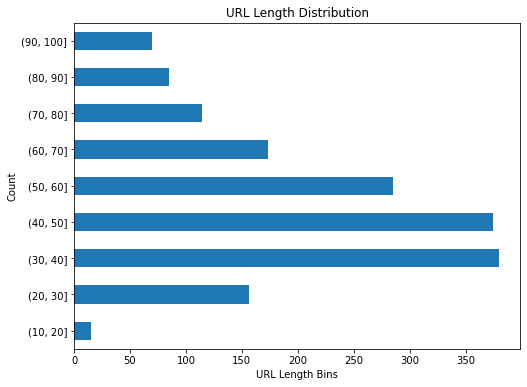

In [32]:
# Define the bins
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Use pandas cut() function to categorize 'URL_LENGTH' into the bins
df['URL_LENGTH_BIN'] = pd.cut(df['URL_LENGTH'], bins=bins)

# Count the occurrences of each bin
bin_counts = df['URL_LENGTH_BIN'].value_counts()

# Sort the bins by their values
bin_counts = bin_counts.sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='barh', rot=0)
plt.title('URL Length Distribution')
plt.xlabel('URL Length Bins')
plt.ylabel('Count')
plt.show()


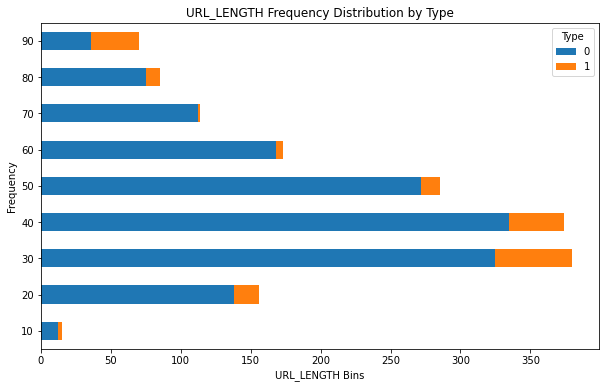

In [33]:
# Create bins for URL_LENGTH
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Cut URL_LENGTH into bins and assign bin labels to a new column
new_df['URL_LENGTH_BIN'] = pd.cut(new_df['URL_LENGTH'], bins=bins, labels=bins[:-1])

# Group by URL_LENGTH_BIN and Type, and get the count of occurrences
grouped = new_df.groupby(['Type','URL_LENGTH_BIN']).size().unstack().T

# Plot the bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

# Set the labels and title
ax.set_xlabel('URL_LENGTH Bins')
ax.set_ylabel('Frequency')
ax.set_title('URL_LENGTH Frequency Distribution by Type')

# Show the plot
plt.show()


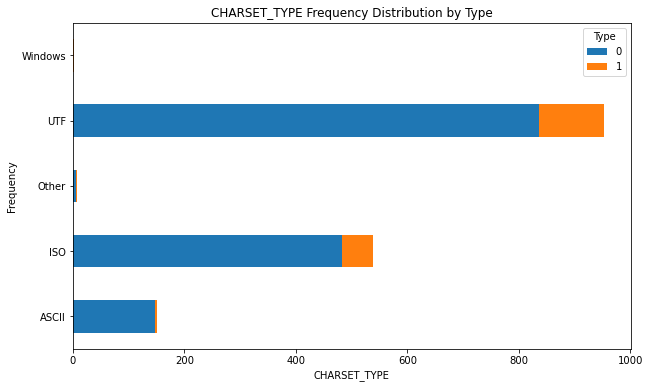

In [34]:
grouped = new_df.groupby(['Type','CHARSET_TYPE']).size().unstack().T

# Plot the bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

# Set the labels and title
ax.set_xlabel('CHARSET_TYPE')
ax.set_ylabel('Frequency')
ax.set_title('CHARSET_TYPE Frequency Distribution by Type')

# Show the plot
plt.show()


In [35]:
new_df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,...,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_TYPE,SERVER_TYPE,SITE_AGE,UPDATE_AGE,URL_LENGTH_BIN
0,16,7,iso-8859-1,nginx,None,None,2015-10-10 18:21:00,NaT,7,0,...,1153,832,9,2.0,1,ISO,nginx,2755.0,NaN,10
1,16,6,UTF-8,Apache/2.4.10,None,None,NaT,NaT,17,7,...,1265,1230,17,0.0,0,UTF,Apache,NaN,NaN,10
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,NaT,NaT,0,0,...,0,0,0,0.0,0,ASCII,Microsoft,NaN,NaN,10
3,17,6,ISO-8859-1,nginx,US,AK,1997-10-07 04:00:00,2013-09-12 00:45:00,31,22,...,18784,4380,39,8.0,0,ISO,nginx,9332.0,3513.0,10
4,17,6,UTF-8,None,US,TX,1996-05-12 00:00:00,2017-04-11 00:00:00,57,2,...,129889,4586,61,4.0,0,UTF,others,9845.0,2206.0,10


## ML Modeling using Random Forest 

In [36]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create an instance of LabelEncoder
label_encoder1 = LabelEncoder()

label_encoder2= LabelEncoder()
# Encode 'CHARSET_TYPE' column
new_df['CHARSET_TYPE'] = label_encoder1.fit_transform(new_df['CHARSET_TYPE'])

# Encode 'SERVER_TYPE' column
new_df['SERVER_TYPE'] = label_encoder2.fit_transform(new_df['SERVER_TYPE'])

# Save the label encoder object to a pickle file
with open('CharsetEncoder.pkl', 'wb') as f:
    pickle.dump(label_encoder1, f)
    
# Save the label encoder object to a pickle file
with open('ServerEncoder.pkl', 'wb') as f:
    pickle.dump(label_encoder2, f)

In [37]:
new_df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,...,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_TYPE,SERVER_TYPE,SITE_AGE,UPDATE_AGE,URL_LENGTH_BIN
0,16,7,iso-8859-1,nginx,None,None,2015-10-10 18:21:00,NaT,7,0,...,1153,832,9,2.0,1,1,2,2755.0,NaN,10
1,16,6,UTF-8,Apache/2.4.10,None,None,NaT,NaT,17,7,...,1265,1230,17,0.0,0,3,0,NaN,NaN,10
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,NaT,NaT,0,0,...,0,0,0,0.0,0,0,1,NaN,NaN,10
3,17,6,ISO-8859-1,nginx,US,AK,1997-10-07 04:00:00,2013-09-12 00:45:00,31,22,...,18784,4380,39,8.0,0,1,2,9332.0,3513.0,10
4,17,6,UTF-8,None,US,TX,1996-05-12 00:00:00,2017-04-11 00:00:00,57,2,...,129889,4586,61,4.0,0,3,3,9845.0,2206.0,10


In [38]:
# Drop rows with null values in specific columns
new_df.dropna(subset=['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Reset index after dropping rows
new_df.reset_index(drop=True, inplace=True)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = new_df[['NUMBER_SPECIAL_CHARACTERS','CHARSET_TYPE','SERVER_TYPE','SITE_AGE']]  # Features
y = new_df['Type']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
# Predict on the test set (Testing the model)
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9602649006622517


In [41]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'MaliciousWebsiteDetectorModel.pkl')


['MaliciousWebsiteDetectorModel.pkl']